In [ ]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_no_repost = pd.read_csv('leidin_weibo_corpus_no_reposts.csv', encoding='utf-8')
df_no_repost

,weibo_id,user_id,content,timestamp,repost?
0,4329965703478798,4029934035,时尚穿搭阁莱穿搭时尚#时尚穿搭##口罩# 戴对口罩，抗菌又防过敏每次有流行感冒或传染疾...,2019-01-19 00:08:00+00:00,0
1,4329966915040183,9090730462,韩国MERS 疫情：逾八成患者被5名“超级病人”传染 t.cn/RUykdC8,2019-01-19 00:13:00+00:00,0
2,4329967263641157,3189178957,韩国ME RS疫情：逾八成患者被5名“超级病人”传染 t.cn/RUykdC8,2019-01-19 00:15:00+00:00,0
3,4329967539732706,6787656883,#延安爆料# 2名养殖户用泔水喂猪被安塞分局依法拘留近几个月来，非洲猪瘟一直都是热门话题，随...,2019-01-19 00:16:00+00:00,0
4,4329969537234430,2123653743,韩国ME RS疫情：逾八成患者被5名“超级病人”传染 t.cn/RUykdC8,2019-01-19 00:24:00+00:00,0
...,...,...,...,...,...
2319378,4487224605020283,2179656136,#今年是1961年以来气温第二高年份#去年的北京已经要疯了，今年待着口罩会不会口罩脸,2020-03-27 22:59:00+00:00,0
2319379,4487224592629032,2908929269,#武磊说出了国更爱国#谈到最近的感受武磊表示：刚开始我觉得在当地大多数人确实对这个不太重视，...,2020-03-27 22:59:00+00:00,0
2319380,4487224542270966,5316411426,#防抗新型冠状病毒肺炎#【晋江一男子隐瞒境外入泉行程轨迹被查】日前，晋江市池店镇潘湖村黄某海...,2020-03-27 22:59:00+00:00,0
2319381,4487224701320675,4659920810,风雪中党的声音传来 周六周日要加班冰雨中党的温暖送来 周末上班没补贴你听听这风雨 它有多大你...,2020-03-27 23:00:00+00:00,0


Total number of non-reposts: 2319383
Number of posts containing first-person pronouns: 798367
Number of posts after filtering by content length: 642330


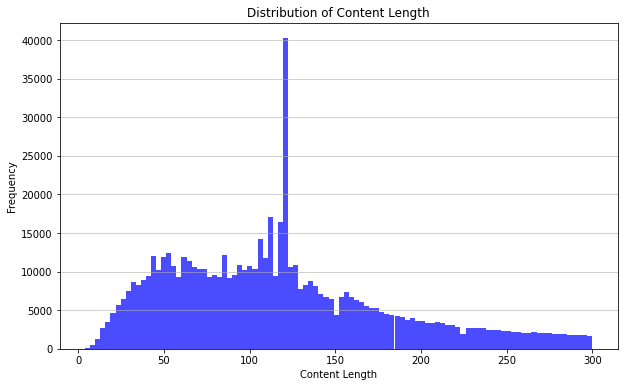

In [3]:
print(f"Total number of non-reposts: {len(df_no_repost)}")

df_i = df_no_repost[
    df_no_repost['content'].str.contains('我') | 
    df_no_repost['content'].str.contains('本人') | 
    df_no_repost['content'].str.contains('吾') |
    df_no_repost['content'].str.contains('余') |
    df_no_repost['content'].str.contains('咱') |
    df_no_repost['content'].str.contains('俺') 
]

print(f"Number of posts containing first-person pronouns: {len(df_i)}")

df_i['content_len'] = df_i['content'].apply(lambda x: len(x))
df_i = df_i[df_i['content_len'] <= 300]
df_i = df_i[df_i['content_len'] >= 3]

print(f"Number of posts after filtering by content length: {len(df_i)}")

#plot distribution of content length
plt.figure(figsize=(10, 6))
plt.hist(df_i['content_len'], bins=100, color='blue', alpha=0.7)
plt.title('Distribution of Content Length')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

#df_i.to_csv('leidin_weibo_corpus_first_person.csv', index=False, encoding='utf-8')

In [ ]:
from deep_translator import GoogleTranslator

df_translate = pd.read_csv('leidin_weibo_corpus_first_person_translated.csv', encoding='utf-8')

translations = df_translate['content_en'].tolist()
translator = GoogleTranslator(source='zh-CN', target='en')
for i, row in tqdm(df_translate.iterrows()):
    if row['content_en'] != "": # skip empty content
        continue
    if i % 1000 == 0:
        print(f"Translating row {i} of {len(df_translate)}")
        # save translations so far to avoid losing progress
        df_translate['content_en'] = translations
        df_translate.to_csv('leidin_weibo_corpus_first_person_translated.csv', index=False, encoding='utf-8')
    try:
        translation = translator.translate(row['content'])
        translations[i] = translation
    except Exception as e:
        print(f"Error translating {row['content']} at row {i}: {e}")
        translations[i] = "" 

0it [00:00, ?it/s]

Translating row 0 of 642330
